## Observations and Insights 

In [16]:
#  %matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata
study_results
# Combine the data into a single dataset
combined_mousestudy_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')
# Display the data table for preview
combined_mousestudy_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [18]:
# Checking the number of mice.
number_miceCombined=combined_mousestudy_df['Mouse ID'].nunique()
number_miceCombined

249

In [19]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice=combined_mousestudy_df.loc[combined_mousestudy_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [20]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_mousestudy_df.loc[combined_mousestudy_df['Mouse ID']=='g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [21]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_mousestudy_df[combined_mousestudy_df['Mouse ID'].isin(duplicate_mice)==False]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [22]:
# Checking the number of mice in the clean DataFrame.
number_miceClean=clean_data.nunique()['Mouse ID']
number_miceClean

248

## Summary Statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_stat = clean_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
mean_stat
median_stat = clean_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
median_stat
variance_stat = clean_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
variance_stat
std_stat = clean_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
std_stat
sem_stat = clean_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
sem_stat
summary_stat_df = pd.DataFrame({
    "Mean": mean_stat,
    "Median": median_stat,
    "Variance": variance_stat,
    "Standard Deviation": std_stat,
    "SEM": sem_stat
})

summary_stat_df


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_data.groupby("Drug Regimen").agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std','sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

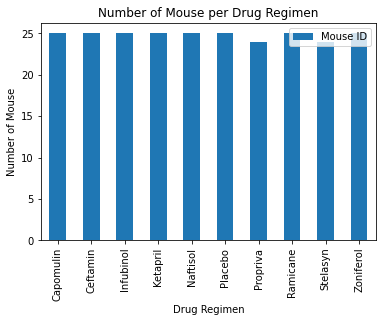

In [25]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
combined_mousestudy_bp=clean_data.groupby("Drug Regimen").nunique()["Mouse ID"]
# plt.xlabel("Drug Regimen")
# plt.ylabel("Number of Mouse")

combined_mousestudy_bp
combined_mousestudyDF = pd.DataFrame(combined_mousestudy_bp)
combined_mousestudyDF.plot(kind="bar")
plt.ylabel('Number of Mouse')
plt.title('Number of Mouse per Drug Regimen')
plt.legend(loc=1)
#generate title, labels on axes, make it more presentable and add legend

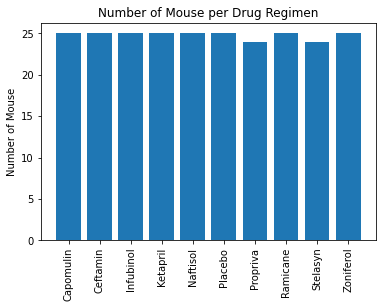

In [26]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
combined_mousestudyRG=clean_data.groupby("Drug Regimen").nunique()['Mouse ID']
combined_mousestudyRG
#combined_mouseRG_df = pd.DataFrame({
 #   "Mouse ID": combined_mousestudy_df.groupby("Drug Regimen").nunique()['Mouse ID']
    
#})
# combined_mouseRG_df
plt.bar(combined_mousestudyRG.index.values,combined_mousestudyRG.values)
plt.xticks(rotation=90)
plt.ylabel('Number of Mouse')
plt.title('Number of Mouse per Drug Regimen')
plt.show()

#combined_mouseRG_df.loc["Mouse ID"]
#combined_mousestudyRG_df.loc['Drug Regimen']
#combined_mousestudyRG[combined_mousestudyRG.columns[0]]
#drug_regimen = combined_mousestudyRG.iloc[:,0]

#how to extract each column into a series, in order to generate values for x_axis and y_axis

Text(0.5, 1.0, 'Distribution of Female versus Male')

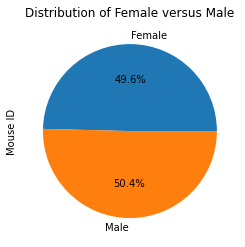

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

combined_mousestudy_pc=clean_data.groupby("Sex").nunique()['Mouse ID']
combined_mousestudy_pc.plot(kind="pie", autopct='%1.1f%%')
plt.title('Distribution of Female versus Male')
# combined_mousestudy_pc

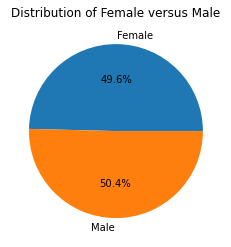

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(combined_mousestudy_pc.values, labels = ['Female', 'Male'], autopct='%1.1f%%')
plt.title('Distribution of Female versus Male')
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [29]:
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


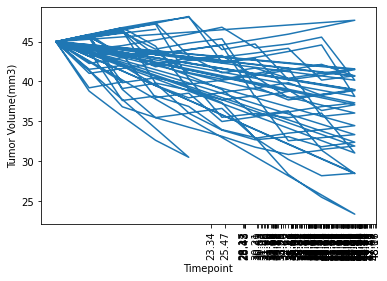

In [127]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
columns = ["Timepoint", "Tumor Volume (mm3)"]
capomulin_mouse = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin", columns]
capomulin_mouse
timepoint = capomulin_mouse.iloc[:,0]
timepoint
tumor_volume = capomulin_mouse.iloc[:,1]
tumor_volume
plt.plot(timepoint, tumor_volume)
plt.ylabel('Tumor Volume(mm3)')
plt.xlabel('Timepoint')
#plt.xticks(tumor_volume, rotation=90)

plt.show()

# What is wrong with my line plot?


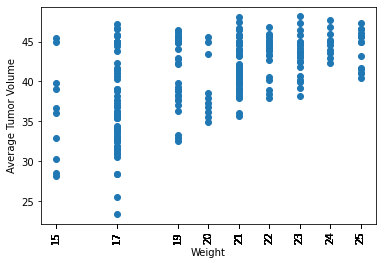

In [108]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
columns = ["Tumor Volume (mm3)", "Weight (g)"]
capomulin_TW = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin", columns]
capomulin_TW
weight = capomulin_TW.iloc[:,1]
weight
tumor_volumeTW = capomulin_TW.iloc[:,0]
tumor_volumeTW
plt.scatter(weight, tumor_volumeTW)
plt.xticks(weight, rotation=90)
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume')
plt.show()

# Is average tumor volume same as tumor volume?

## Correlation and Regression

In [121]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

capomulin_TW
correlation = st.pearsonr(weight,tumor_volumeTW)
correlation

#print(f"The correlation coefficient between mouse weight and average tumor volume for Capomulin regimen is {round(st.pearsonr(weight,tumor_volumeTW)[0],2)}")

(0.525699555207717, 9.605446629502006e-18)

In [119]:
# Perform a linear regression on weight versus average tumor volume for the Capomulin Regimen
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(weight, tumor_volumeTW)
vc_r

0.5256995552077166

In [120]:
# Create equation of line to calculate predicted average tumor volume 
vc_fit = vc_slope * weight + vc_int

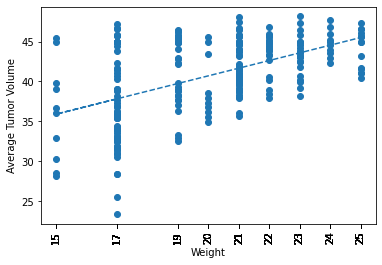

In [116]:
columns = ["Tumor Volume (mm3)", "Weight (g)"]
capomulin_TW = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin", columns]
capomulin_TW
weight = capomulin_TW.iloc[:,1]
weight
tumor_volumeTW = capomulin_TW.iloc[:,0]
tumor_volumeTW
plt.scatter(weight, tumor_volumeTW)
plt.plot(weight,vc_fit,"--")
plt.xticks(weight, rotation=90)
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume')
plt.show()

# Is average tumor volume same as tumor volume?